## 1. 背景及所要研究的问题 ：
   由数据来源Kaggle网站得知，泰坦尼克号沉没事件造成了2224名乘客和船员当中的1502人丧生。所提供的数据中包括了每个人年龄、性别、是否生存、船舱等级等详细的信息。这篇文章将会根据这些数据试图分析：在泰坦尼克事件中具有哪些特征的人群具有高的生存率？

## 2. 加载模块及数据

**加载分析所用模块及函数，加载绘图模块**

In [2]:
import matplotlib.pyplot as plti
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
from pandas import DataFrame, Series


**读取数据**

In [3]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## 3. 初步浏览数据及数据整理

In [4]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


将性别数据由string: Female & Male转化为integer 0和1,便于后面分析男女比例 




In [6]:
sex_map = {'female': 0, 'male': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Emarked值缺失两个，先根据Embarked值进行分类并查数量

In [9]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
titanic_df.groupby(['Embarked'],as_index = False).count()

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,C,168,168,168,168,168,130,168,168,168,168,69
1,Q,77,77,77,77,77,28,77,77,77,77,4
2,S,644,644,644,644,644,554,644,644,644,644,129


上面结果显示644人的Embarked值为'S',占绝大多数，所以用S来补充缺失的Embarked值

In [24]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

Age和Cabin缺失较多，不进行补全，以免后面分析失真。再次总揽一下数据情况如下：

In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## 4. 数据分析:

**4.1 先不考虑各变量之间的相互影响，进行各变量分别进行分析**

各变量总体统计数据如下：

In [27]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


以上表可以看出：
1. 平均生存率为38.3%， 与Kaggle网站显示的全体2224人的生存率40%相当。
2. 船舱等级中位数为3，均值为2.3， 说明大多数为低等舱位。
3. 性别均值为0.647，说明男性较多

下面将对两个连续变量Age和Fare进行图形分析


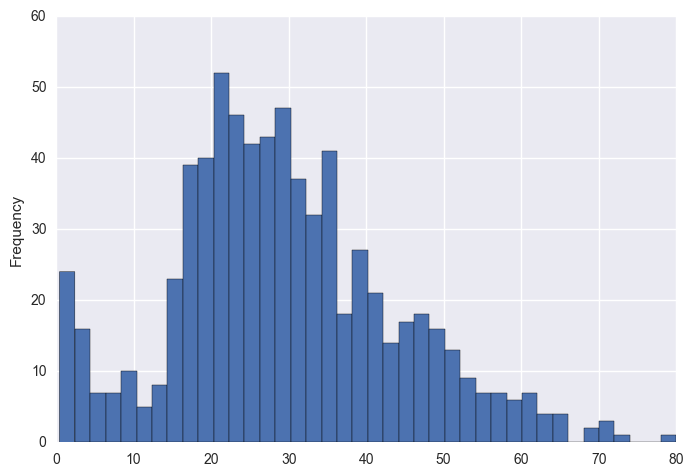

In [33]:
titanic_df['Age'].plot.hist(bins = 40)

上面图可以看出年龄总体呈正态分布，但是0至10岁有一个明显的outlier

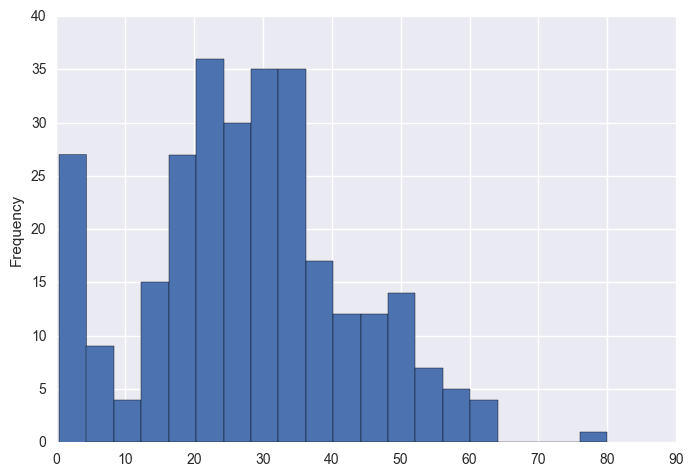

In [30]:
survived_group = titanic_df.groupby(["Survived"]).get_group(1)
survived_group['Age'].plot.hist(bins = 20)
#survived_group['Age'].describe()

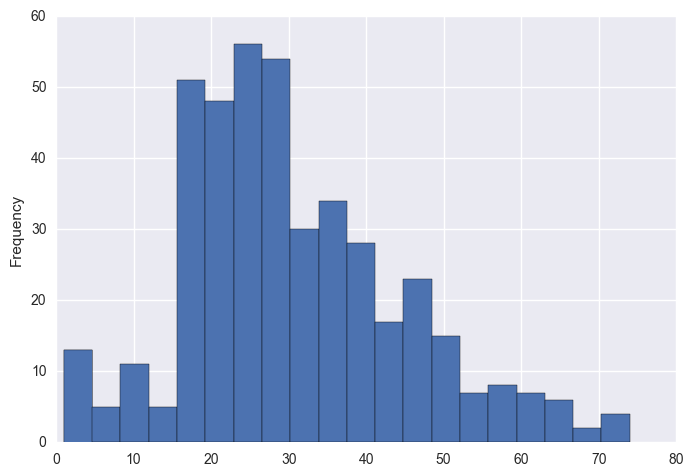

In [31]:
nonsurvived_group= titanic_df.groupby(["Survived"]).get_group(0)
nonsurvived_group['Age'].plot.hist(bins = 20)
#nonsurvived_group['Age'].describe()

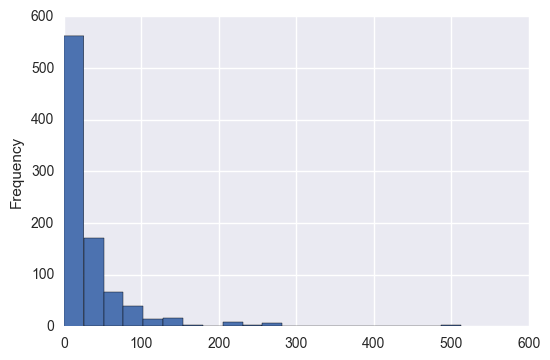

In [28]:
titanic_df['Fare'].plot.hist(bins = 20)

上面图片说明绝大部分人付费较低，这和大部分人船舱等级较低是相合的

**4.2 以下通过图表方式研究各变量和生存情况(Survived)的关系**

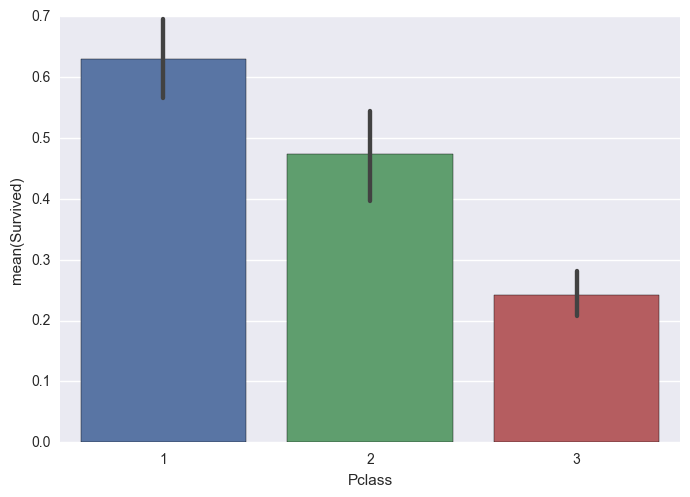

In [36]:
sns.barplot('Pclass', 'Survived', data=titanic_df)

船舱等级和生存率有一定的相关性

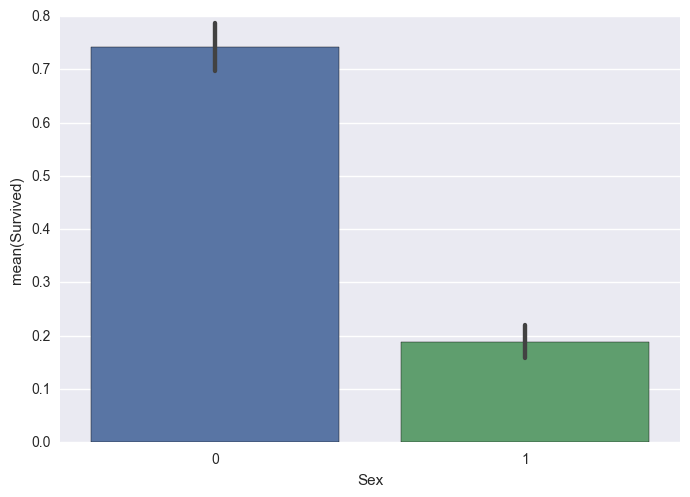

In [40]:
sns.barplot('Sex', 'Survived', data=titanic_df)

性别和生存率有较大的相关性

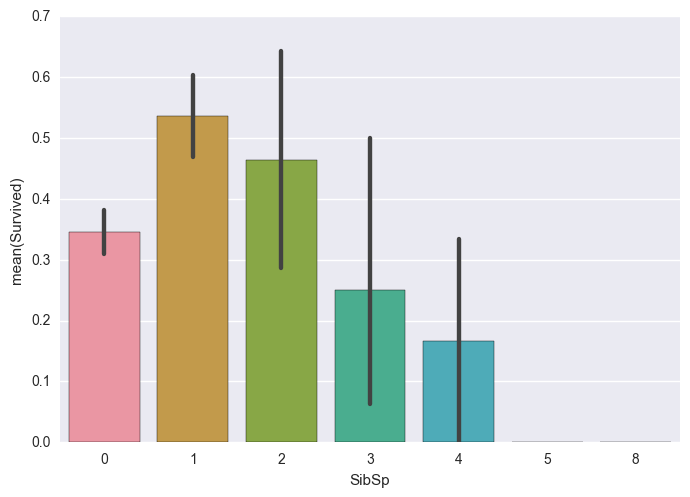

In [41]:
sns.barplot('SibSp', 'Survived', data=titanic_df)

Sibsp指登船的兄弟姐妹或者配偶，上图显示有较少的sibsp的生存率最高，没有sibsp或sibsp较多生存率低

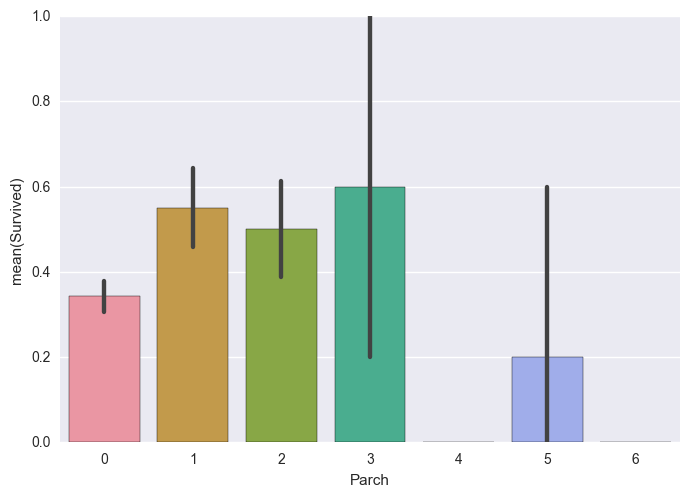

In [42]:
sns.barplot('Parch', 'Survived', data=titanic_df)

Parch指同行的父母或者子女个数，上图不能看出明显的Parch和生存率的相关性。

对于两个连续变量与Survived的关系，采用列表方式进行分析

In [34]:
titanic_df[["Fare", "Survived"]].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Fare
1,1,48.395408
0,0,22.117887


In [35]:
titanic_df[["Age", "Survived"]].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Age
1,1,28.343690
0,0,30.626179


对于两个较明显的和生存率有相关性的变量Sex和Pclass，我们把它们放在同一张图表中看看和生存率的关系

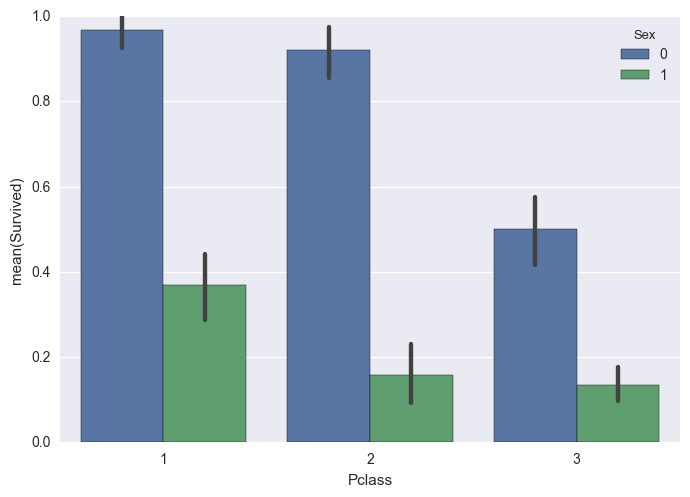

In [44]:
sns.barplot('Pclass', 'Survived',hue="Sex", data=titanic_df)

上面图表可以看出，头等舱和二等舱女性的生存率达到了惊人的90%以上，即使是三等舱也有50%左右。而男性的生存率最高也没有超过50%，二等和三等舱更是不超过20%。

## 6. 初步结论